# Linear regressor and decision trees

A decision tree can also be used to do regression. How does it compare to a linear regression model?

We'll try this out on a dataset that we generate ourselves.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

What does the data look like? Create a scatter plot of X vs y.

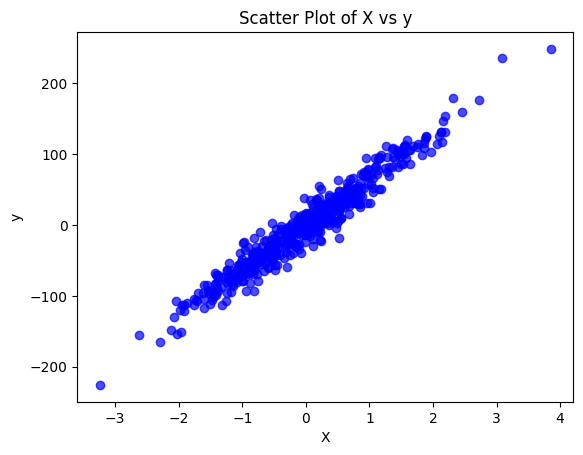

In [2]:
#DELETE
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Scatter Plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Create the models

First create a linear regression model on this data. The train and test-split has been made in the first cell. Also calculate the RMSE for this model.

In [3]:
#DELETE
from sklearn.metrics import mean_squared_error
import numpy as np


# Fit a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE for Linear Regression: {rmse_linear}")


RMSE for Linear Regression: 14.43656219505991


Now do the same for a decision tree!

In [4]:
#DELETE
# Fit a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

# Calculate RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"RMSE for Decision Tree: {rmse_tree}")

RMSE for Decision Tree: 16.25378759059848


You'll note the RMSE for decision trees is slightly higher. Let's plot the results next to each other to analyze them visually.

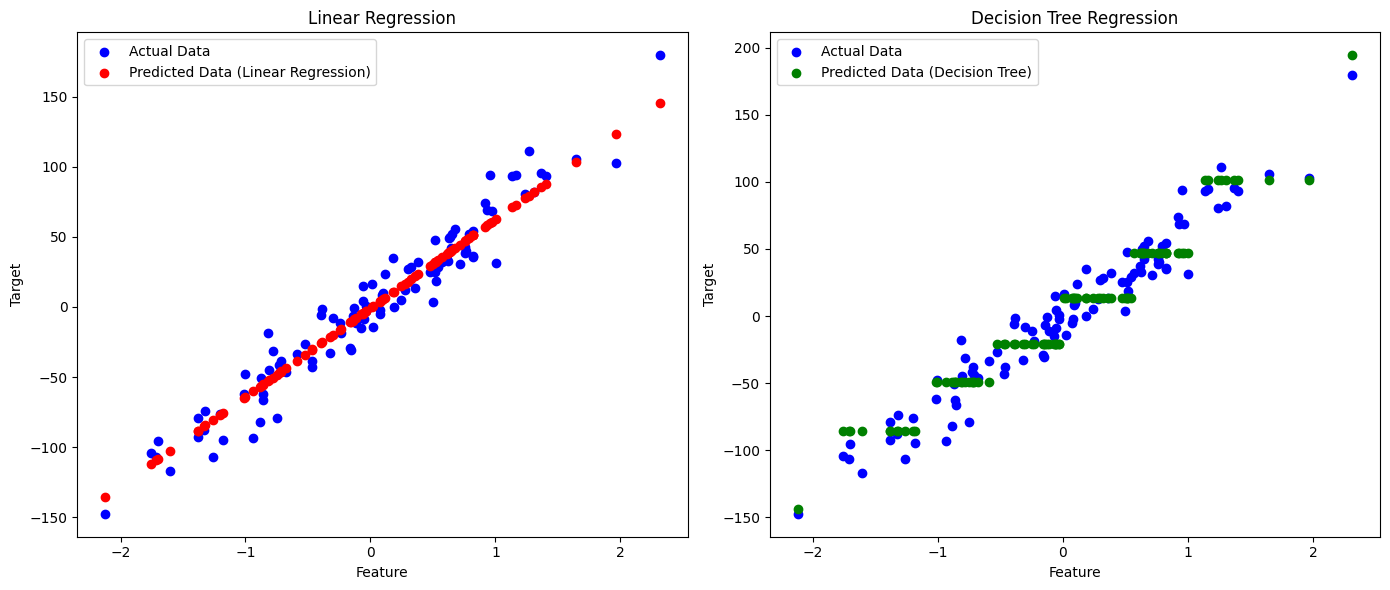

In [5]:
#DELETE
# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_linear, color='red', label='Predicted Data (Linear Regression)')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Plot Decision Tree Regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='green', label='Predicted Data (Decision Tree)')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

Although the decision tree has only predicted straight lines, it's still not a bad prediction.

## Non linear data

Suppose we make new data, this time data that is not linear but quadratic. Which model would be best in that case?

In [6]:
# Generate quadratic data
np.random.seed(42)  # For reproducibility
X = np.sort(5 * np.random.rand(500, 1), axis=0)  # 100 random points in the range [0, 5]
y = X**2 + np.random.randn(500, 1) * 2  # Quadratic relationship with some noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Draw the graph again?

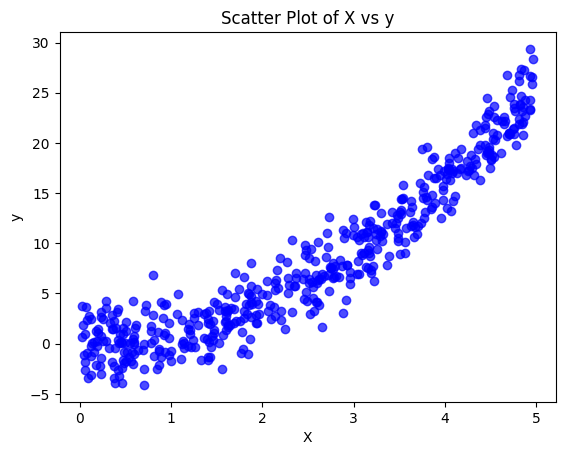

In [7]:
#DELETE
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Scatter Plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Now create the same two models as before, print the RMSE's and the graphs.

(This comes down to copy-pasting all three code-blocks from above here.)


RMSE for Linear Regression: 3.0837233653882588
RMSE for Decision Tree: 2.261671155570052


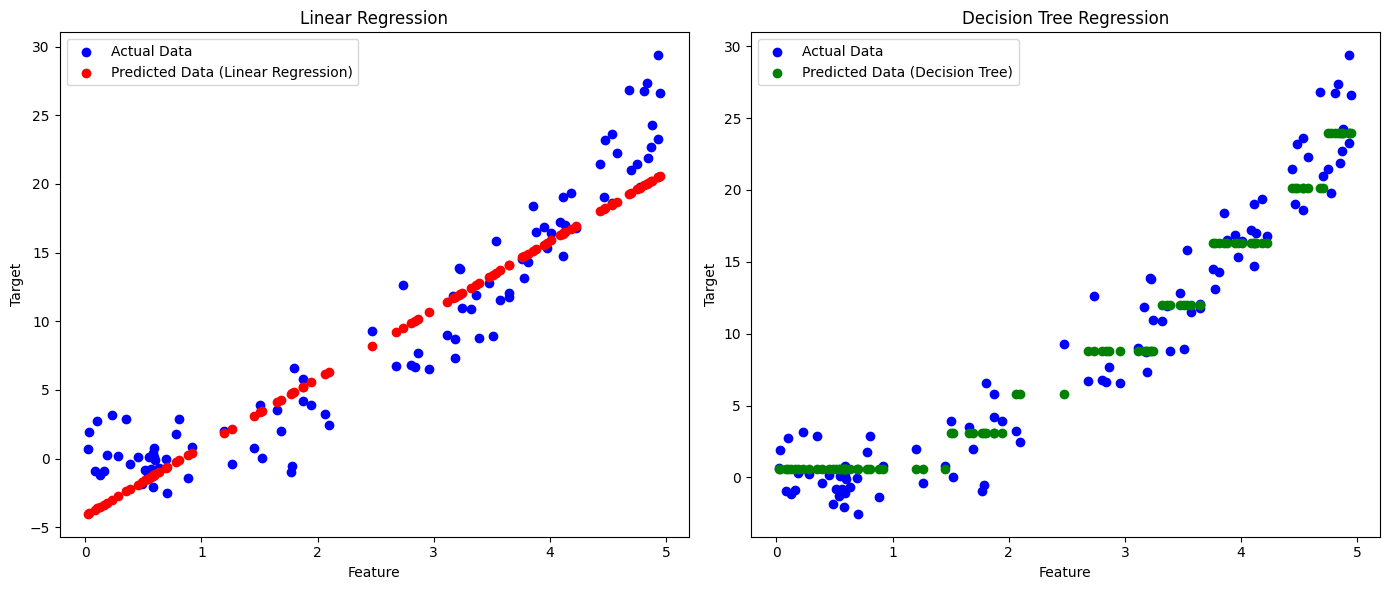

In [8]:
#DELETE
# Fit a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_regressor.predict(X_test)

# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE for Linear Regression: {rmse_linear}")

# Fit a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
tree_regressor.fit(X_train, y_train)

y_pred_tree = tree_regressor.predict(X_test)

# Calculate RMSE
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f"RMSE for Decision Tree: {rmse_tree}")

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot Linear Regression results
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_linear, color='red', label='Predicted Data (Linear Regression)')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# Plot Decision Tree Regression results
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_tree, color='green', label='Predicted Data (Decision Tree)')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

As was to be expected the decision tree is much better now. So to summarise: If you're sure the data is linear, use a linear regressor. If you're not, use a decision tree.

## Data export

I've really gotten to like this dataset, so let's export it. And to keep things fair we'll even export the train/test-split.

Because we want to put multiple variables (X_train, X_test, y_train and y_test) in a single pickle-file we'll put them in a dicitionary first.

In [11]:
data_dict = {
    'X': X,
    'y': y,
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Save the data dictionary to a file
import pickle
with open('exports/non_linear_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

And because we'll also want to do a comparison of models, let's export the predictions on our test-set as well.

In [ ]:
with open('exports/y_pred_linear.pkl', 'wb') as f:
    pickle.dump(y_pred_linear, f)

with open('exports/y_pred_tree.pkl', 'wb') as f:
    pickle.dump(y_pred_tree, f)
